In [42]:
#common
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import  GridSearchCV 
from sklearn.metrics import classification_report

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


For the following code, I haven't changed the percentage values and vegetation features. I have ran the modules by keeping them as it is.

2. Preprocess the data  
  
A) Encode the categorical features  
B) Abbreviate the column names  
C) Standardize the numerical features  
D) Handle NaNs (either fill them with Median values or make a better choice if available)  
E) Convert percentage to value/100 (check which option gives better result, as-is or divided/100)  
F) Scale the vegetation features (ndvi*) as 0, 1 (0 <= 0.25 and 1 > 0.25) as it is in scale of 0 to 0.5. Retain as is or use other scaling based on how model performs.  
G) Make an 80-20 train-test split  

In [2]:
df = pd.read_csv('dengue_features_train.csv')

# Preprocessing

A) Encode the categorical features  

In [3]:
#Changing the type to categorical value
df.year = df.year.astype('category')
df.city = df.city.astype('category')

B) Abbreviate the column names 

In [4]:
#Abbreviating the column names  
d = {'station': 'stn', 'reanalysis': 're_an','humidity': 'hd','precipitation':'prec'}

def replace_all(text, dic):
    for i, j in dic.items():
        text.columns = text.columns.str.replace(i, j)
    return text

replace_all(df,d)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [5]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'prec_amt_mm', 're_an_air_temp_k',
       're_an_avg_temp_k', 're_an_dew_point_temp_k', 're_an_max_air_temp_k',
       're_an_min_air_temp_k', 're_an_precip_amt_kg_per_m2',
       're_an_relative_hd_percent', 're_an_sat_precip_amt_mm',
       're_an_specific_hd_g_per_kg', 're_an_tdtr_k', 'stn_avg_temp_c',
       'stn_diur_temp_rng_c', 'stn_max_temp_c', 'stn_min_temp_c',
       'stn_precip_mm'],
      dtype='object')

In [9]:
lb = pd.read_csv('dengue_labels_train.csv')

In [10]:
lb.year = lb.year.astype('category')

In [11]:
#Merge data
df_merged = df.merge(lb,on=['city','year','weekofyear'],how='inner')

D) Handle NaNs (either fill them with Median values or make a better choice if available)  

In [12]:
#Handling of NaNs
df_filledna = df_merged.fillna(method='ffill',inplace=True) #add comment not using mean coz spread is long

In [13]:
df_merged["total_cases"] = df_merged["total_cases"].astype('float64')

# Feature Selection

For the feature selection I am using correlation matrix.

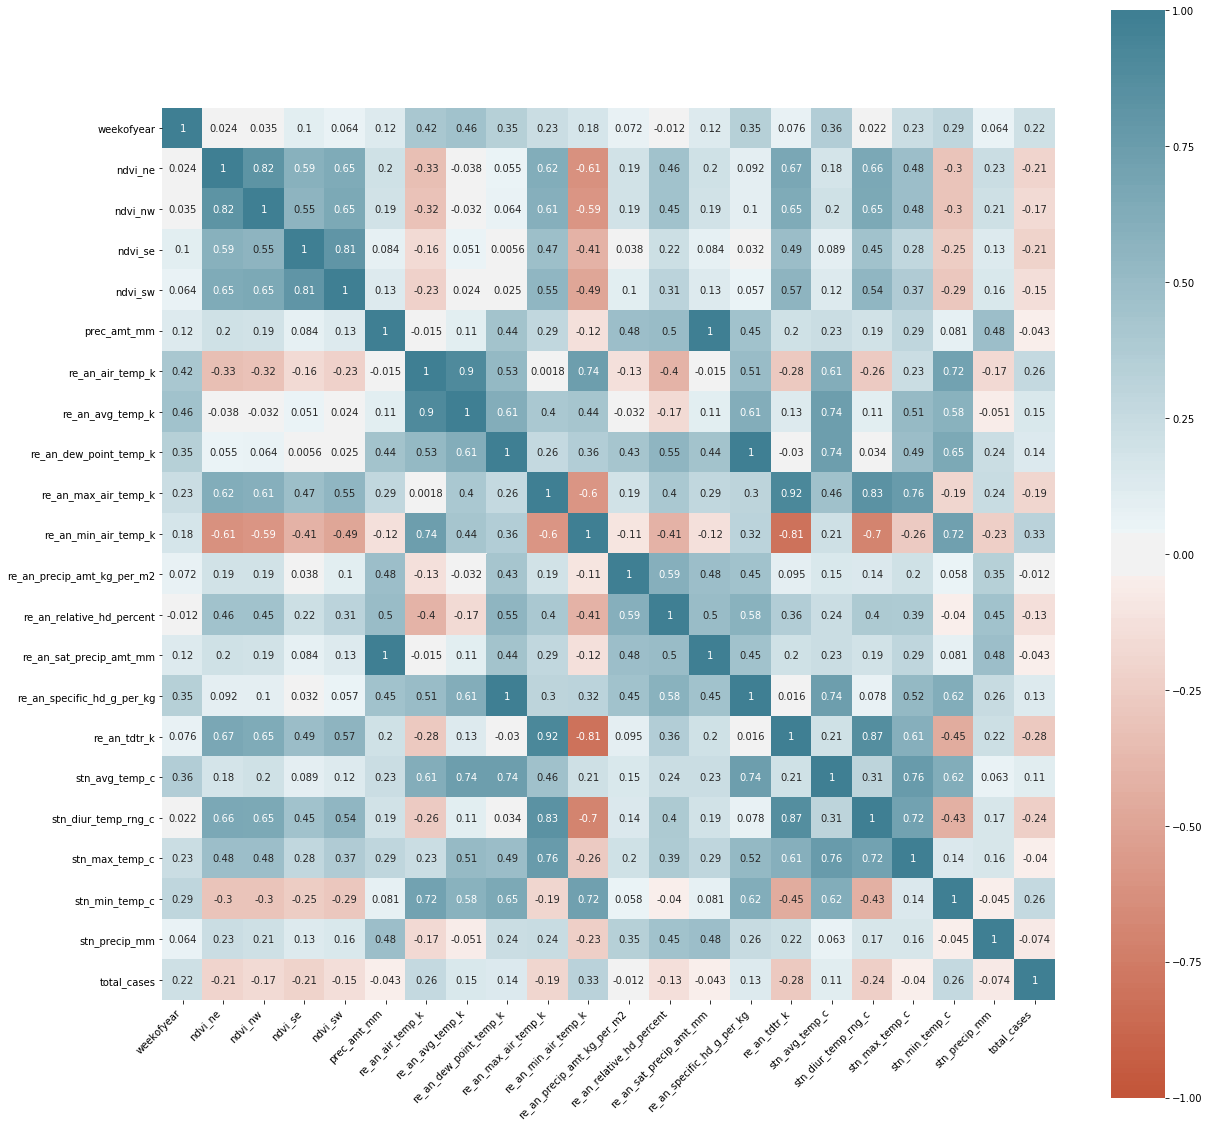

In [14]:
corr = df_merged.corr()
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We can see that following pairs are exactly similar since the correlation between them is 1.
1. prec_amt_mm = re_an_sat_precip_amt_mm
2. re_an_dew_point_temp_k = re_an_specific_hd_g_per_kg

There's no need to take both the features. So, I am not considering   
re_an_sat_precip_amt_mm & re_an_specific_hd_g_per_kg

In [15]:
#Features and labels
X_draft = df_merged.drop(['week_start_date',
                    're_an_sat_precip_amt_mm',                 #repeatative
                    're_an_specific_hd_g_per_kg',              #repeatative
                    're_an_precip_amt_kg_per_m2',              #low correlation with total_cases
                    're_an_air_temp_k',                        #multicollinearity with re_an_avg_temp_k
                    're_an_max_air_temp_k',                    #keeping re_an_tdtr_k: Diurnal temperature range
                    're_an_min_air_temp_k',                    #keeping re_an_tdtr_k: Diurnal temperature range
                    'stn_max_temp_c',                          #We have Average temperature
                    'stn_min_temp_c',                          #We have Average temperature
                    'total_cases'],axis=1)
y = df_merged['total_cases']

In [17]:
X_draft.shape

(1456, 15)

In [135]:
type(X_draft)

pandas.core.frame.DataFrame

In [18]:
cat_feature = ["city", 'year']
#convert the attributes to categorical form
for i in cat_feature:
    X_draft[i] = X_draft[i].astype("category")
    X_draft[i] = X_draft[i].astype("category")

#Convert categorical variable into dummy/indicator variables
X_conv = pd.get_dummies(X_draft[['city','year']])

In [136]:
type(X_conv)

pandas.core.frame.DataFrame

C) Standardize the numerical features  

In [19]:
scaler = StandardScaler()
#Applying the StandardScaler to all the numerical data
X_scaled = scaler.fit_transform(X_draft.drop(columns=['city', 'year'],axis=1))
X = np.concatenate((X_scaled,np.array(X_conv)),axis=1)

G) Make an 80-20 train-test split  

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [137]:
type(y_train)

pandas.core.series.Series

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1164, 36), (292, 36), (1164,), (292,))

# LinearSVR

In [94]:
linear_svr_reg = LinearSVR(C=100,max_iter=2000)

max_iter = 2000 : Keeping it as 1000 gives MAE as 17.109  : Since the data is small and the traintime is less, we can afford it to be higher. However, going further than 2000 slows down the MAE decrease rate.

C: is a regulation parameter. Higher the C, the regulazation is less and thus, Margin vioations would be less but there will be a risk of overfitting. 

In [95]:
linear_svr_reg.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=100, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=2000,
          random_state=None, tol=0.0001, verbose=0)

In [96]:
y_predict = linear_svr_reg.predict(X_test)

In [97]:
mae = mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error: " ,mae)

Mean Absolute Error:  16.985750632015943


# Plotting  the learning curve

In [54]:
def plot_learning_curves(model):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_absolute_error(y_train[:m], y_train_predict))
        val_errors.append(mean_absolute_error(y_test, y_val_predict))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")

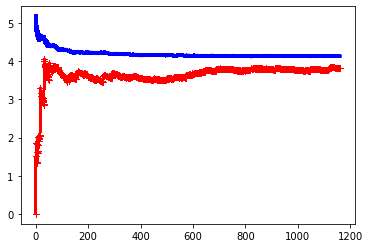

In [55]:
plot_learning_curves(linear_svr_reg)

#  SVR with Linear Kernel  

In [111]:
svr_reg = SVR(degree=4,kernel='linear',C=13)

degree: This is the polynomial function for the 

C = 100 gives the MAE as 16.97 but keeping at ~10 gives the MAE as 17.44 which is not significantly lower; Also keeping regularization parameter large, might cause the overfiiting problem

In [115]:
svr_reg.fit(X_train,y_train)

SVR(C=13, cache_size=200, coef0=0.0, degree=4, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [116]:
y_predict1 = svr_reg.predict(X_test)


In [117]:
mae = mean_absolute_error(y_test, y_predict1)
print("Mean Absolute Error: " ,mae)

Mean Absolute Error:  17.04475523267154


# Plotting Learning Curve

In [120]:
def plot_learning_curves1(model, X, y):
    train_errors1, val_errors1 = [], []
    for m in range(1, len(X_train)):
        svr_reg.fit(X_train[:m], y_train[:m])
        y_train_predict = svr_reg.predict(X_train[:m])
        y_val_predict = svr_reg.predict(X_test)
        train_errors1.append(mean_absolute_error(y_train[:m], y_train_predict))
        val_errors1.append(mean_absolute_error(y_test, y_val_predict))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")

KeyboardInterrupt: 

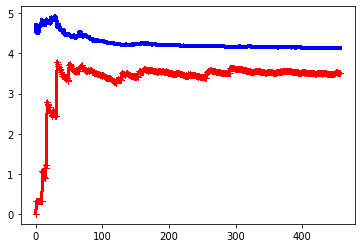

In [121]:
plot_learning_curves1(svr_reg,X_train,y_train)

# SVR with GridSearchCV

In [126]:
svr = GridSearchCV(SVR(kernel='linear', gamma=0.1),
                   param_grid={"C": [1, 10, 100, 1000],})

GridSearchCV provides the exhaustive search over parameter values for an estimator.

In [128]:
svr.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma=0.1, kernel='linear', max_iter=-1,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [129]:
svr.best_params_

{'C': 1000}

In [130]:
y_svr = svr.predict(X_test)

In [131]:
mae = mean_absolute_error(y_test, y_svr)
print("Mean Absolute Error: " ,mae)

Mean Absolute Error:  16.98393071096984
